---
---
# Regression Loss Functions
---
---

## Libraries Import

In [36]:
import tensorflow as tf
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Loading Data

In [37]:
# Load the Boston housing dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# standardize dataset
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

print("Data loaded and normalized.")

Data loaded and normalized.


## Modeling

In [38]:
# Define the model to use to test and compare the different loss functions
def build_model(loss_function):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss=loss_function, metrics=['mae'])
    return model

### Mean Squared Error (MSE)

This loss function calculates the average of the squares of the differences between the actual and predicted values. It's very sensitive to outliers as the errors are squared before they are averaged, which gives a larger error.


In [39]:
model_mse = build_model('mean_squared_error')
history = model_mse.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=1, verbose=1)

Epoch 1/10
404/404 [==============================] - 1s 2ms/step - loss: 395.2639 - mae: 17.5063 - val_loss: 202.7497 - val_mae: 11.9460
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 89.3171 - mae: 6.8039 - val_loss: 57.9990 - val_mae: 5.9138
Epoch 3/10
404/404 [==============================] - 1s 2ms/step - loss: 37.9486 - mae: 4.2090 - val_loss: 33.9522 - val_mae: 4.4274
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 27.6072 - mae: 3.6320 - val_loss: 29.3073 - val_mae: 4.1566
Epoch 5/10
404/404 [==============================] - 1s 3ms/step - loss: 23.6028 - mae: 3.3826 - val_loss: 25.9319 - val_mae: 4.0136
Epoch 6/10
404/404 [==============================] - 1s 4ms/step - loss: 21.2712 - mae: 3.2846 - val_loss: 24.4707 - val_mae: 3.7558
Epoch 7/10
404/404 [==============================] - 2s 4ms/step - loss: 19.1741 - mae: 3.1281 - val_loss: 23.6055 - val_mae: 3.6100
Epoch 8/10
404/404 [==============================] - 1s 2

In [40]:
# evaluate the model
train_mse = model_mse.evaluate(X_train_scaled, y_train, verbose=0)
test_mse = model_mse.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[1], test_mse[1]))

Train: 2.543, Test: 3.262


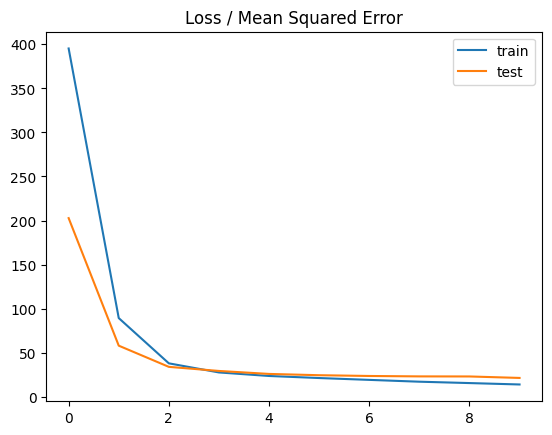

In [41]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Mean Absolute Error (MAE)
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

In [42]:
model_mae = build_model('mean_absolute_error')
history = model_mae.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=1, verbose=1)

Epoch 1/10
404/404 [==============================] - 1s 2ms/step - loss: 15.7643 - mae: 15.7643 - val_loss: 7.7405 - val_mae: 7.7405
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 5.0892 - mae: 5.0892 - val_loss: 4.9668 - val_mae: 4.9668
Epoch 3/10
404/404 [==============================] - 1s 2ms/step - loss: 3.8714 - mae: 3.8714 - val_loss: 4.1857 - val_mae: 4.1857
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 3.5210 - mae: 3.5210 - val_loss: 3.8617 - val_mae: 3.8617
Epoch 5/10
404/404 [==============================] - 1s 2ms/step - loss: 3.3440 - mae: 3.3440 - val_loss: 3.7893 - val_mae: 3.7893
Epoch 6/10
404/404 [==============================] - 1s 2ms/step - loss: 3.1797 - mae: 3.1797 - val_loss: 3.6245 - val_mae: 3.6245
Epoch 7/10
404/404 [==============================] - 1s 2ms/step - loss: 3.0514 - mae: 3.0514 - val_loss: 3.2077 - val_mae: 3.2077
Epoch 8/10
404/404 [==============================] - 1s 3ms/step - loss: 

In [43]:
# evaluate the model
train_mae = model_mae.evaluate(X_train_scaled, y_train, verbose=0)
test_mae = model_mae.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mae[1], test_mae[1]))

Train: 2.535, Test: 2.852


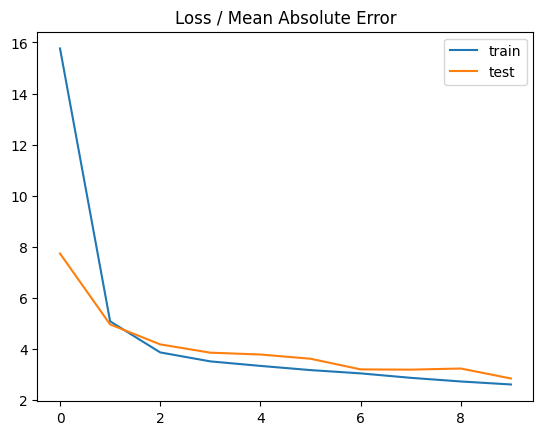

In [44]:
# plot loss during training
plt.title('Loss / Mean Absolute Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Mean Absolute Percentage Error (MAPE)
MAPE expresses accuracy as a percentage, and is calculated as the average absolute percent difference between predicted and actual values for each instance.

In [45]:
model_mape = build_model('mean_absolute_percentage_error')
history = model_mape.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=1, verbose=1)

Epoch 1/10
404/404 [==============================] - 1s 2ms/step - loss: 74.0966 - mae: 17.3645 - val_loss: 48.4589 - val_mae: 11.6464
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 26.0674 - mae: 6.2429 - val_loss: 26.8140 - val_mae: 6.1020
Epoch 3/10
404/404 [==============================] - 1s 2ms/step - loss: 17.8201 - mae: 4.2003 - val_loss: 21.2634 - val_mae: 4.5746
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 15.3242 - mae: 3.4719 - val_loss: 19.0757 - val_mae: 4.0308
Epoch 5/10
404/404 [==============================] - 1s 2ms/step - loss: 14.1115 - mae: 3.1738 - val_loss: 17.5934 - val_mae: 3.7600
Epoch 6/10
404/404 [==============================] - 1s 2ms/step - loss: 13.5536 - mae: 3.0252 - val_loss: 17.3878 - val_mae: 3.6385
Epoch 7/10
404/404 [==============================] - 1s 2ms/step - loss: 12.6645 - mae: 2.8429 - val_loss: 16.1057 - val_mae: 3.4474
Epoch 8/10
404/404 [==============================] - 1s 2ms

In [46]:
# evaluate the model
train_mape = model_mape.evaluate(X_train_scaled, y_train, verbose=0)
test_mape = model_mape.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mape[1], test_mape[1]))

Train: 2.460, Test: 3.205


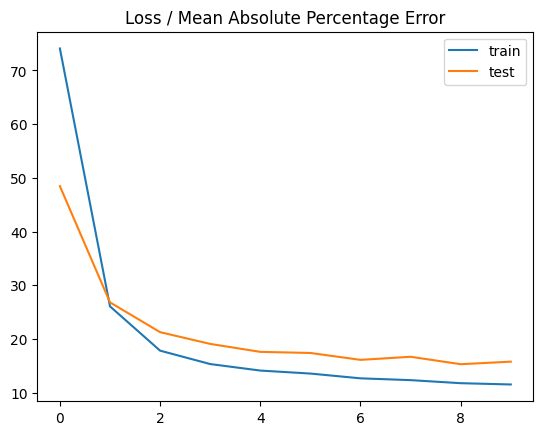

In [47]:
# plot loss during training
plt.title('Loss / Mean Absolute Percentage Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


### Huber Loss
Huber Loss is less sensitive to outliers in data than the squared error loss. It’s quadratic for small errors and linear for large errors.

In [48]:
model_huber = build_model(tf.keras.losses.Huber())
history = model_huber.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=1, verbose=1)

Epoch 1/10
404/404 [==============================] - 2s 2ms/step - loss: 14.5507 - mae: 15.0438 - val_loss: 7.5459 - val_mae: 8.0219
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 4.7097 - mae: 5.1848 - val_loss: 4.5916 - val_mae: 5.0612
Epoch 3/10
404/404 [==============================] - 1s 2ms/step - loss: 3.2566 - mae: 3.7237 - val_loss: 3.6201 - val_mae: 4.0947
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 2.7859 - mae: 3.2482 - val_loss: 3.4657 - val_mae: 3.9345
Epoch 5/10
404/404 [==============================] - 1s 2ms/step - loss: 2.5964 - mae: 3.0551 - val_loss: 2.9586 - val_mae: 3.4218
Epoch 6/10
404/404 [==============================] - 1s 2ms/step - loss: 2.3919 - mae: 2.8439 - val_loss: 2.9739 - val_mae: 3.4311
Epoch 7/10
404/404 [==============================] - 1s 2ms/step - loss: 2.2529 - mae: 2.7128 - val_loss: 2.6437 - val_mae: 3.1061
Epoch 8/10
404/404 [==============================] - 1s 2ms/step - loss: 

In [49]:
# evaluate the model
train_huber = model_huber.evaluate(X_train_scaled, y_train, verbose=0)
test_huber = model_huber.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_huber[1], test_huber[1]))

Train: 2.239, Test: 2.886


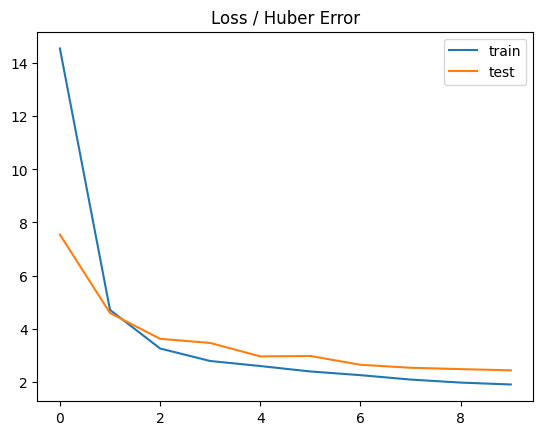

In [50]:
# plot loss during training
plt.title('Loss / Huber Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


### Conclusion
These loss functions are selected based on the specific characteristics of the data and the training needs:
- **MSE** is great when you have normal data without much noise and outliers.
- **MAE** is robust to outliers and is often used when the distribution of data is unknown.
- **MAPE** is useful for prediction targets that are in relative scales or comparison.
- **Huber** combines the robustness of MAE with the efficiency of MSE for small errors.